Introduction to Classification - INSURANCE CLAIM ANALYSIS
Introduction to Logistic Regression

Sigmoid Function

Confusion Matrix

Classification Evaluation Metrics

https://www.kaggle.com/code/mohamedbakrey/make-a-prediction-for-insurance-claim-report

https://youtu.be/ntBa7YKc9XM?si=1V1RL0wCmxM_gjor  Regression price

https://youtu.be/OOLhKLXCJiU?si=dWxvFk82mVO8WxEP DBSCAN

https://www.kaggle.com/code/pavansanagapati/ensemble-learning-techniques-tutorial
Boosting
Introduction to Boosting
https://www.kaggle.com/code/prashant111/bagging-vs-boosting 
Adaptive Boosting
https://www.kaggle.com/discussions/accomplishments/485459#2708350 
Gradient Boosting

XG Boosting

Assignment

 Support Vector Machine
https://www.kaggle.com/code/faressayah/support-vector-machine-pca-tutorial-for-beginner

https://www.kaggle.com/code/egazakharenko/support-vector-machines-svm-from-scratch
Introduction to SVM

Support Vectors and Hyperplane

Hard and Soft Margin

Polynomial and Radial Basis Kernel Function

SVM for multi-class Classification

SVM for Regression
https://www.kaggle.com/code/prashant111/svm-classifier-tutorial

=====================
 Unsupervised Learning - CUSTOMER PARTTERN MATCHING
https://www.youtube.com/watch?v=afPJeQuVeuY 
Understand Customers with KMeans Clustering in Python
Introduction to Clustering
https://www.datacamp.com/blog/introduction-to-unsupervised-learning
K-Means Clustering

Principal Component Analysis

Assignment
https://youtu.be/JtgSrB5J0_w?si=1mnGkPv50hfyBtLn
================

 CAPSTONE PROJECT - CREDIT CARD FRAUD DETECTION
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/discussion/277570
https://data-flair.training/blogs/credit-card-fraud-detection-python-machine-learning/
==========================
Decision Tree and Random Forest - HEART DISEASE PREDICTION
https://www.kaggle.com/code/nayeem091/a-guide-to-any-classification-problem
Introduction to Decision Tree
https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
Gini Index and Entropy

Advantage and Disadvantage

Pruning Techniques

Decision Tree for Regression

Introduction to Random Forest
https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()
print(data.DESCR)

data.data

data.target

data.feature_names

import pandas as pd
import numpy as np
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [ ]:
df
df.sample(2)

df.target.unique()


df = df[df.target != 2] #for implementing log regression for two class


In [ ]:
df.target.unique()

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train.shape, y_train.shape


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

y_pred

classifier.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred))

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

y_pred_proba


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Plot ROC curve,
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')  # Plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set plot title
plt.legend(loc="lower right")  # Add legend to the plot
plt.show()  # Show the plot

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [ ]:
cv = KFold(n_splits=5)
cv

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv = cv, scoring = "accuracy")

scores
np.mean(scores)

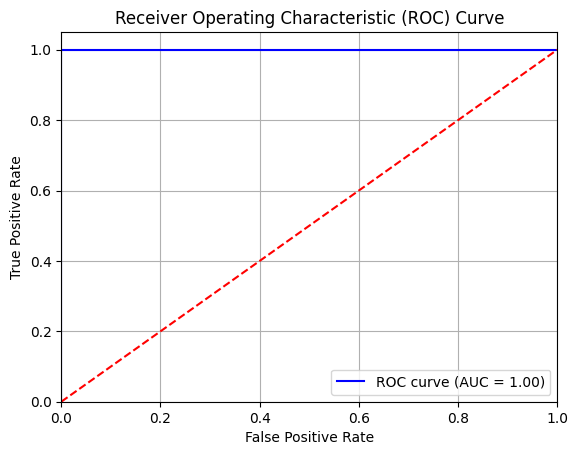

In [1]:
# roc_auc

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# For binary classification, let's use only two classes (0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
